### A quick demo on what to start with:

You start with a new cluster and you need some python libraries to start the project.
So you pip install the tools. If you ever need them again, just uncomment the commands out and carry these to your next jupyter notebook. 

In [2]:
#!pip3 install hist

In [3]:
#!pip3 install mplhep

In [4]:
#!pip3 install uproot

In [5]:
#!pip3 install vector

In [2]:
import hist
import uproot
import vector
from math import pi
import numpy as np
import awkward as ak
import mplhep as hep
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

### Here's a nominal histogram .root file:

Nominal means there's no uncertainty correction applied to the "data". 
You open it with uproot and view the objects wtih .keys() module.  

For a general and powerful uproot reference, check: https://uproot.readthedocs.io/en/latest/basic.html

In [7]:
histogram_nominal = uproot.open('/home/he614/phys323/histogram_nominal.root')

In [3]:
minitree = uproot.open('/home/he614/phys323/minitree_200.root')

In [4]:
minitree.keys()

['hist_0;1', 'Step0;1', 'hist;1', 'Step7;1', 'Step8;1']

### Structure of this Data

Step0/Step7 are trees. 

Step0 is parton level information classified as ttbar decay into lepton and neutrino pairs. 
Step7 contains both reconstructed kinematic observables at the detector level after event selection and the corresponding parton level kinematics after event selection. 

To view the branch names, do the following:

In [10]:
minitree['Step7'].keys()

['HT',
 'ST',
 'MET',
 'HT_check',
 'MET_phi',
 'l_pt',
 'l_eta',
 'l_phi',
 'l_mass',
 'sl_pt',
 'sl_eta',
 'sl_phi',
 'sl_mass',
 'e_pt',
 'e_eta',
 'e_phi',
 'e_charge',
 'mu_pt',
 'mu_eta',
 'mu_phi',
 'mu_charge',
 'lep_pt',
 'lep_eta',
 'lep_phi',
 'lep_mass',
 'lep_pdgid',
 'alep_pt',
 'alep_eta',
 'alep_phi',
 'alep_mass',
 'alep_pdgid',
 'ljet_pt',
 'ljet_eta',
 'ljet_phi',
 'ljet_mass',
 'sljet_pt',
 'sljet_eta',
 'sljet_phi',
 'sljet_mass',
 'llbar_deta',
 'llbar_dphi',
 'bbbar_deta',
 'bbbar_dphi',
 'weight_size',
 'nweight',
 'weight',
 'jet_size',
 'njet_btag',
 'jet_btag',
 'njet_pt',
 'jet_pt',
 'njet_eta',
 'jet_eta',
 'njet_phi',
 'jet_phi',
 'njet_mass',
 'jet_mass',
 'genpart_size',
 'ngenpart_pid',
 'genpart_pid',
 'ngenpart_status',
 'genpart_status',
 'ngenpart_pt',
 'genpart_pt',
 'ngenpart_eta',
 'genpart_eta',
 'ngenpart_phi',
 'genpart_phi',
 'ngenpart_mass',
 'genpart_mass',
 'gen_top_pt',
 'gen_top_eta',
 'gen_top_phi',
 'gen_top_mass',
 'gen_top_status',
 

In [5]:
minitree['Step8'].keys()

['lep_pt',
 'lep_eta',
 'lep_phi',
 'lep_mass',
 'lep_pdgid',
 'alep_pt',
 'alep_eta',
 'alep_phi',
 'alep_mass',
 'alep_pdgid',
 'b_pt',
 'b_eta',
 'b_phi',
 'b_mass',
 'ab_pt',
 'ab_eta',
 'ab_phi',
 'ab_mass',
 'neu_pt',
 'neu_eta',
 'neu_phi',
 'aneu_pt',
 'aneu_eta',
 'aneu_phi',
 'top_pt',
 'top_eta',
 'top_phi',
 'top_mass',
 'top_rap',
 'atop_pt',
 'atop_eta',
 'atop_phi',
 'atop_mass',
 'atop_rap',
 'tt_mass',
 'tt_pt',
 'tt_eta',
 'tt_phi',
 'tt_rap',
 'met_pt',
 'met_phi',
 'weight_size',
 'weight',
 'gen_tt_mass',
 'gen_tt_pt',
 'gen_tt_eta',
 'gen_tt_phi',
 'gen_tt_rap',
 'gen_top_pt',
 'gen_top_eta',
 'gen_top_phi',
 'gen_top_mass',
 'gen_top_rap',
 'gen_atop_pt',
 'gen_atop_eta',
 'gen_atop_phi',
 'gen_atop_mass',
 'gen_atop_rap',
 'gen_b_pt',
 'gen_b_eta',
 'gen_b_phi',
 'gen_b_mass',
 'gen_ab_pt',
 'gen_ab_eta',
 'gen_ab_phi',
 'gen_ab_mass',
 'gen_lep_pt',
 'gen_lep_eta',
 'gen_lep_phi',
 'gen_lep_mass',
 'gen_lep_pdgid',
 'gen_alep_pt',
 'gen_alep_eta',
 'gen_alep_ph

### Here's a way to filter the items you want and put them in an array of strings

In [12]:
lep_branches = minitree['Step7'].keys(filter_name="*lep*")

In [13]:
lep_branches

['lep_pt',
 'lep_eta',
 'lep_phi',
 'lep_mass',
 'lep_pdgid',
 'alep_pt',
 'alep_eta',
 'alep_phi',
 'alep_mass',
 'alep_pdgid',
 'gen_lep_pt',
 'gen_lep_eta',
 'gen_lep_phi',
 'gen_lep_mass',
 'gen_lep_pdgid',
 'gen_lep_status',
 'gen_alep_pt',
 'gen_alep_eta',
 'gen_alep_phi',
 'gen_alep_mass',
 'gen_alep_pdgid',
 'gen_alep_status']

In [14]:
#histogram_nominal.keys()

### We can also define dictionaries from the tree

In [6]:
minitree = uproot.open('/home/he614/phys323/minitree_200.root')
step8tree = minitree['Step8']

In [7]:
tree_vars = [
    'lep_pt', 'lep_eta', 'lep_phi', 'lep_mass',
    'alep_pt', 'alep_eta', 'alep_phi', 'alep_mass',
    'top_pt', 'top_eta', 'top_phi', 'top_mass', 
    'tt_pt', 'tt_eta', 'tt_phi', 'tt_mass',
    'gen_lep_pt', 'gen_lep_eta', 'gen_lep_phi', 'gen_lep_mass',
    'gen_alep_pt', 'gen_alep_eta', 'gen_alep_phi', 'gen_alep_mass',
    'gen_top_pt', 'gen_top_eta', 'gen_top_phi', 'gen_top_mass', 
    'gen_atop_pt', 'gen_atop_eta', 'gen_atop_phi', 'gen_atop_mass',
    'gen_tt_pt', 'gen_tt_eta', 'gen_tt_phi', 'gen_tt_mass',
    'atop_pt', 'atop_eta', 'atop_phi', 'atop_mass', 'b_pt', 'gen_b_pt',
    'weight_size', 'weight'
]

step8 = dict( (tree_var, step8tree[tree_var].array()) for tree_var in tree_vars ) 

# Top and Lepton 4-Vectors
top = vector.zip({'pt': step8["top_pt"], 'phi': step8["top_phi"], 'eta': step8["top_eta"], 'M': step8["top_mass"]})
tbar = vector.zip({'pt': step8["atop_pt"], 'phi': step8["atop_phi"], 'eta': step8["atop_eta"], 'M': step8["atop_mass"]})
l = vector.zip({'pt': step8["lep_pt"], 'phi': step8["lep_phi"], 'eta': step8["lep_eta"], 'M': step8["lep_mass"]})
lbar = vector.zip({'pt': step8["alep_pt"], 'phi': step8["alep_phi"], 'eta': step8["alep_eta"], 'M': step8["alep_mass"]})
tt = vector.zip({'pt': step8["tt_pt"], 'phi': step8["tt_phi"], 'eta': step8["tt_eta"], 'M': step8["tt_mass"]})
gen_tt = vector.zip({'pt': step8["gen_tt_pt"], 'phi': step8["gen_tt_phi"], 'eta': step8["gen_tt_eta"], 'M': step8["gen_tt_mass"]})

Then we can call the objects from the 4-vector dictionaries. ex.

In [11]:
top.eta

<Array [-1.28, -1.51, -1.09, ..., -1.41, -2.61, -3.26] type='984 * float32'>

Put the values in a histogram to see the top transverse momentum distribution:

Text(0.5, 0, 'Reconstructed Top Quark $p_T$ (GeV)')

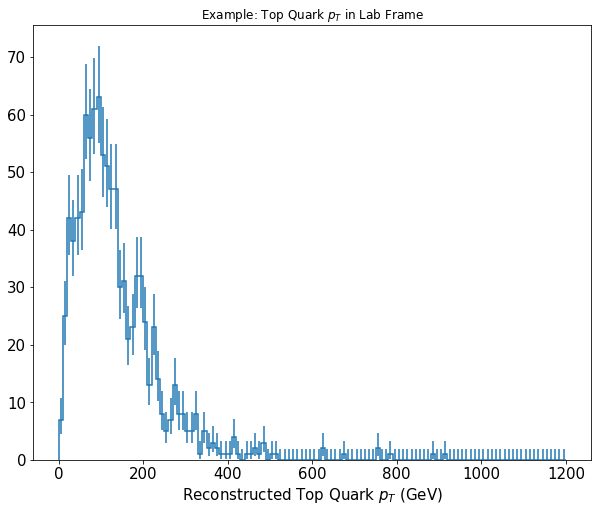

In [18]:
fig, ax = plt.subplots(figsize=(10, 8))

h_top_pt = hist.Hist(hist.axis.Regular(120, 0, 1200, overflow=False, underflow=False, name="Reconstructed Top Quark $p_T$"), storage=hist.storage.Weight())
h_top_pt.fill(top.pt);
hep.histplot(h_top_pt);
plt.title("Example: Top Quark $p_T$ in Lab Frame")
plt.yticks(np.linspace(0,70, 8), fontsize=15)
plt.xticks(np.linspace(0, 1200, 7), fontsize=15)
plt.xlabel('Reconstructed Top Quark $p_T$ (GeV)', fontsize=15)

Text(0.5, 0, 'Reconstructed Top Quark $\\eta$')

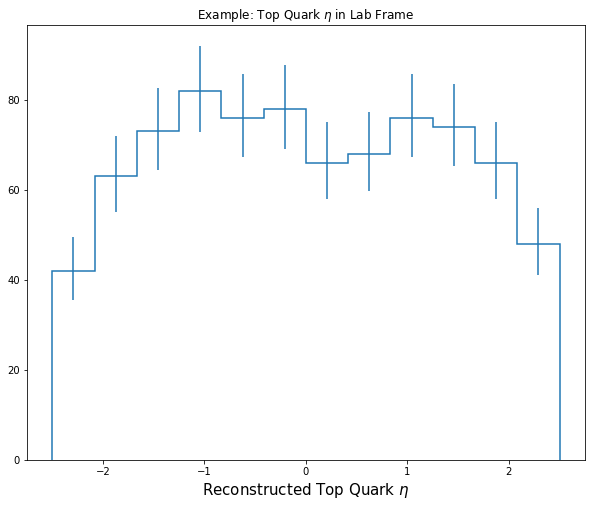

In [18]:
fig, ax = plt.subplots(figsize=(10, 8))

h_top_eta = hist.Hist(hist.axis.Regular(12, -2.5, 2.5, overflow=False, underflow=False, name="Reconstructed Top Quark $\eta$"), storage=hist.storage.Weight())
h_top_eta.fill(top.eta);
hep.histplot(h_top_eta);
plt.title("Example: Top Quark $\eta$ in Lab Frame")
#plt.yticks(np.linspace(0,70, 8), fontsize=15)
#plt.xticks(np.linspace(0, 1200, 7), fontsize=15)
plt.xlabel('Reconstructed Top Quark $\eta$', fontsize=15)

Text(0.5, 0, 'Reconstructed Top Quark Mass (GeV)')

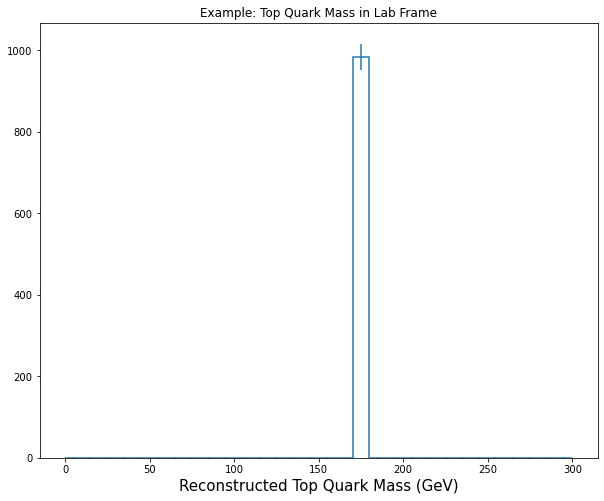

In [17]:
fig, ax = plt.subplots(figsize=(10, 8))

h_top_mass = hist.Hist(hist.axis.Regular(30, 0, 300, overflow=False, underflow=False, name="Reconstructed Top Quark $p_T$"), storage=hist.storage.Weight())
h_top_mass.fill(top.M);
hep.histplot(h_top_mass);
plt.title("Example: Top Quark Mass in Lab Frame")
plt.xlabel('Reconstructed Top Quark Mass (GeV)', fontsize=15)

### We can define histogram object from the existing .root file




In [20]:
h_ttbar_mass = histogram_nominal['Reco_ttbar_mass;1']

You can check the type by using

In [31]:
h_at_phi = histogram_nominal['hgen_tbar_phi;1']

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f0504b5b8b0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

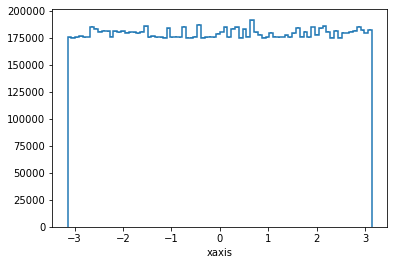

In [41]:
h_at_phi.to_hist().plot1d()

In [21]:
type(h_ttbar_mass)

uproot.models.TH.Model_TH1D_v3

You can use the hist module to view the properties or convert into a different format

In [22]:
h_ttbar_mass.axes[0].edges()

array([ 300.  ,  318.75,  337.5 ,  356.25,  375.  ,  393.75,  412.5 ,
        431.25,  450.  ,  468.75,  487.5 ,  506.25,  525.  ,  543.75,
        562.5 ,  581.25,  600.  ,  625.  ,  650.  ,  675.  ,  700.  ,
        725.  ,  750.  ,  775.  ,  800.  ,  950.  , 1100.  , 1250.  ,
       1400.  , 1550.  , 1700.  , 1850.  , 2000.  ])

In [23]:
h_ttbar_mass.values()

array([     0.,      0.,  43426., 120678., 123938., 111243.,  97155.,
        84068.,  73419.,  64829.,  57193.,  51291.,  45921.,  41723.,
        38607.,  34765.,  40367.,  34708.,  30191.,  26803.,  23190.,
        20368.,  18222.,  15935.,  66250.,  34209.,  18140.,  10298.,
         6020.,   3700.,   2343.,   5266.])

In [24]:
h_ttbar_mass.to_numpy()

(array([     0.,      0.,  43426., 120678., 123938., 111243.,  97155.,
         84068.,  73419.,  64829.,  57193.,  51291.,  45921.,  41723.,
         38607.,  34765.,  40367.,  34708.,  30191.,  26803.,  23190.,
         20368.,  18222.,  15935.,  66250.,  34209.,  18140.,  10298.,
          6020.,   3700.,   2343.,   5266.]),
 array([ 300.  ,  318.75,  337.5 ,  356.25,  375.  ,  393.75,  412.5 ,
         431.25,  450.  ,  468.75,  487.5 ,  506.25,  525.  ,  543.75,
         562.5 ,  581.25,  600.  ,  625.  ,  650.  ,  675.  ,  700.  ,
         725.  ,  750.  ,  775.  ,  800.  ,  950.  , 1100.  , 1250.  ,
        1400.  , 1550.  , 1700.  , 1850.  , 2000.  ]))

### Here's a handy library called mplhep with a compact plotting syntax

mplhep (matplotlib for high energy physics) documentation: <br>
https://github.com/scikit-hep/mplhep/blob/master/examples/Examples.ipynb <br>
https://github.com/andrzejnovak/2021-11-03-agc2021-mplhep/blob/master/mplhep_hist.ipynb <br>
https://github.com/andrzejnovak/2021-11-03-agc2021-mplhep/blob/master/mplhep_hist_bonus.ipynb

Text(0.5, 0, 'ttbar_mass (GeV)')

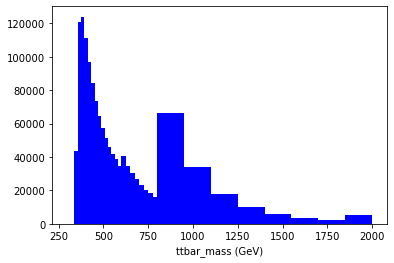

In [25]:
#h_ttbar_mass.axes[0].label = 'lep_pt'
plot_ttbarr_mass = h_ttbar_mass.to_hist().plot1d(histtype='fill', color='b')
plt.xlabel('ttbar_mass (GeV)')

Text(0.5, 0, 'TTBar Mass (GeV)')

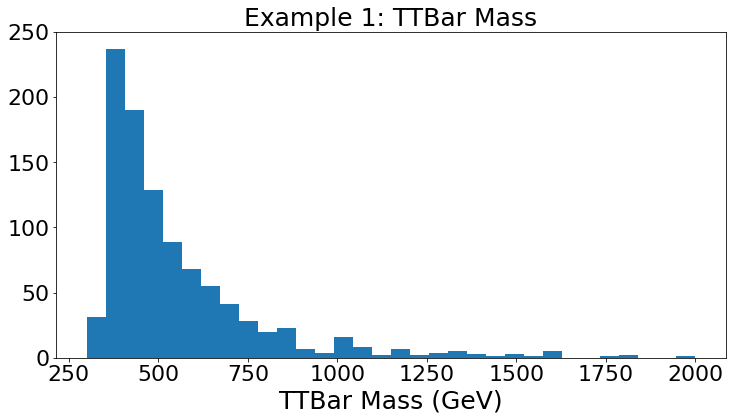

In [26]:
fig, ax = plt.subplots(figsize=(12, 6))

plt.hist(tt.M, np.linspace(300, 2000, 33));
plt.title("Example 1: TTBar Mass", fontsize=25)
plt.yticks(np.linspace(0, 250, 6), fontsize=22)
plt.xticks(np.linspace(250, 2000, 8), fontsize=22)
plt.xlabel('TTBar Mass (GeV)', fontsize=25)

Text(0.5, 0, 'TTBar Mass (GeV)')

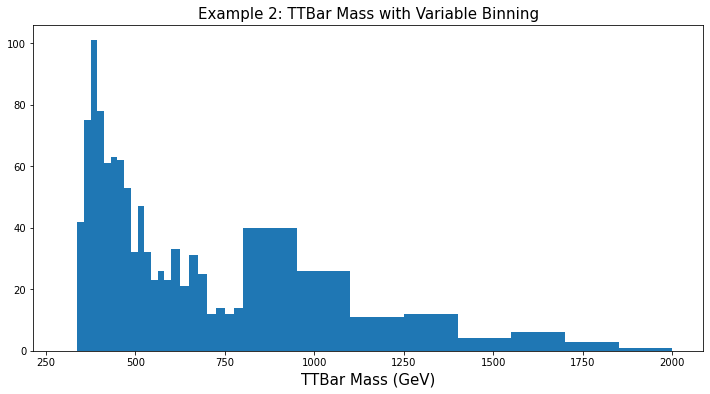

In [27]:
fig, ax = plt.subplots(figsize=(12, 6))

plt.hist(tt.M, h_ttbar_mass.axes[0].edges());
plt.title("Example 2: TTBar Mass with Variable Binning", fontsize=15)
plt.xlabel('TTBar Mass (GeV)', fontsize=15)

## Exercise: Fit both TTBar Mass plots (different binning) with scipy fitting module

Fit the even binning one in the entire x-range. Fit the variable bining one with two separate ranges. <br>
Question: Did the center of the peak change?

Tutorial: https://hsf-training.github.io/hsf-training-uproot-webpage/07-fitting/index.html

### Scipy Fit Test

In [22]:
h1 = hist.new.Reg(100, -10, 10, name="x").Double()
h1.fill(np.random.normal(1, 3, 1_000_000))

Hist(Regular(100, -10, 10, name='x'), storage=Double()) # Sum: 998603.0 (1000000.0 with flow)

In [30]:
x=np.linspace(-10, 10, 40)

In [23]:
def func(x, A, sigma, mu):
    return A*np.exp(-((x - mu)/sigma)**2 / 2)

In [24]:
pars, errors = curve_fit(func, h1.axes[0].centers, h1.values())

In [35]:
h1.axes[0].centers

array([-9.9, -9.7, -9.5, -9.3, -9.1, -8.9, -8.7, -8.5, -8.3, -8.1, -7.9,
       -7.7, -7.5, -7.3, -7.1, -6.9, -6.7, -6.5, -6.3, -6.1, -5.9, -5.7,
       -5.5, -5.3, -5.1, -4.9, -4.7, -4.5, -4.3, -4.1, -3.9, -3.7, -3.5,
       -3.3, -3.1, -2.9, -2.7, -2.5, -2.3, -2.1, -1.9, -1.7, -1.5, -1.3,
       -1.1, -0.9, -0.7, -0.5, -0.3, -0.1,  0.1,  0.3,  0.5,  0.7,  0.9,
        1.1,  1.3,  1.5,  1.7,  1.9,  2.1,  2.3,  2.5,  2.7,  2.9,  3.1,
        3.3,  3.5,  3.7,  3.9,  4.1,  4.3,  4.5,  4.7,  4.9,  5.1,  5.3,
        5.5,  5.7,  5.9,  6.1,  6.3,  6.5,  6.7,  6.9,  7.1,  7.3,  7.5,
        7.7,  7.9,  8.1,  8.3,  8.5,  8.7,  8.9,  9.1,  9.3,  9.5,  9.7,
        9.9])

In [36]:
h1.values()

array([   39.,    46.,    57.,    69.,    99.,   111.,   141.,   193.,
         219.,   264.,   328.,   408.,   498.,   587.,   686.,   867.,
         988.,  1216.,  1408.,  1578.,  1854.,  2214.,  2458.,  3055.,
        3207.,  3864.,  4363.,  4839.,  5508.,  6350.,  6961.,  7792.,
        8613.,  9640., 10319., 11234., 12443., 13489., 14568., 15649.,
       16657., 17893., 18705., 20093., 20910., 21588., 22735., 23369.,
       24061., 24784., 25136., 25952., 26262., 26319., 26578., 26587.,
       26545., 26082., 25941., 25502., 25109., 24389., 23646., 22500.,
       21650., 20844., 19762., 18766., 17755., 16602., 15548., 14702.,
       13517., 12275., 11636., 10470.,  9502.,  8734.,  7761.,  6985.,
        6295.,  5647.,  4931.,  4471.,  3920.,  3374.,  2973.,  2569.,
        2104.,  1887.,  1624.,  1334.,  1150.,   930.,   893.,   661.,
         598.,   469.,   376.,   323.])

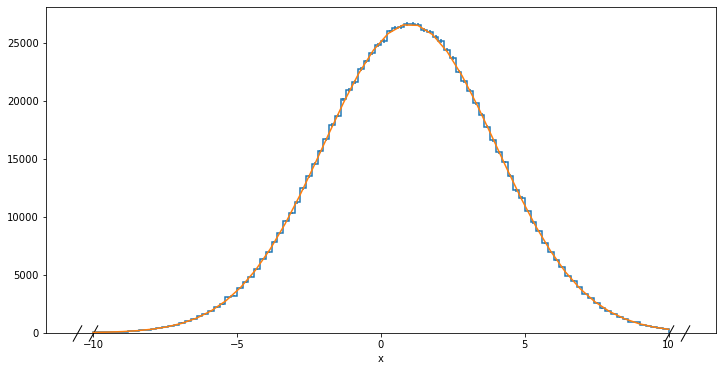

In [29]:
fig, axs = plt.subplots(1, 1, figsize=(12,6))

x=np.linspace(-10, 10, 40)
y=func(x, pars[0], pars[1], pars[2])
hep.histplot(h1);
plt.plot(x, y);